In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# KMeans(
#     n_clusters: Int = 8,
#     *,
#     init: MatrixLike | ((...) -> Any) | Literal['k-means++', 'random'] = "k-means++",
#     n_init: int | Literal['auto', 'warn'] = "warn",
#     max_iter: Int = 300,
#     tol: Float = 0.0001,
#     verbose: Int = 0,
#     random_state: Int | RandomState | None = None,
#     copy_x: bool = True,
#     algorithm: Literal['lloyd', 'elkan', 'auto', 'full'] = "lloyd"
# )

In [3]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__n_init': [10, 20, 30]
}

In [4]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)

In [5]:
grid_search.fit(X)
grid_search.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


{'kmeans__init': 'random', 'kmeans__n_clusters': 5, 'kmeans__n_init': 30}

In [14]:
def plot_clusters(data, labels, centers):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
    plt.title("KMeans Clustering")
    plt.show()

best_kmeans = grid_search.best_estimator_.named_steps['kmeans']
labels = best_kmeans.labels_
centers = best_kmeans.cluster_centers_


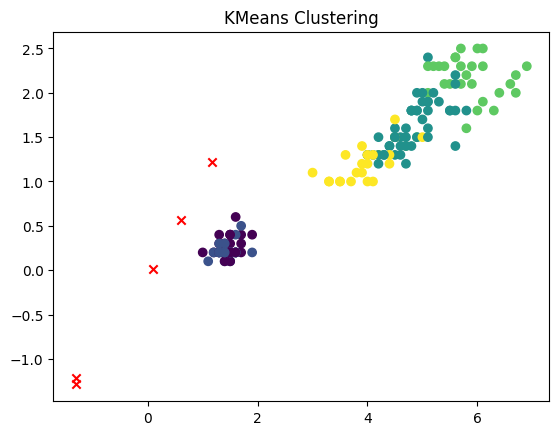

In [15]:
plot_clusters(X[:, -2:], labels, centers[:, -2:])

In [10]:
labels

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 3, 2, 3, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 3, 2, 3, 2, 3, 3, 4, 3, 2, 3,
       3, 2, 3, 2, 2, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3,
       2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2])

In [11]:
centers

array([[-0.72135272,  1.5070215 , -1.30157708, -1.22066912],
       [-1.30780521,  0.19950386, -1.30839757, -1.28911786],
       [ 0.38167879, -0.39095084,  0.60882357,  0.56579901],
       [ 1.39733017,  0.23316022,  1.16062026,  1.21734049],
       [-0.35279167, -1.33300609,  0.10294988,  0.01232382]])

In [12]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

k = 3
labels, centroids = kmeans(X, k)

# Visualization
def plot_clusters(X, labels, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.title("KMeans Clustering from Scratch")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


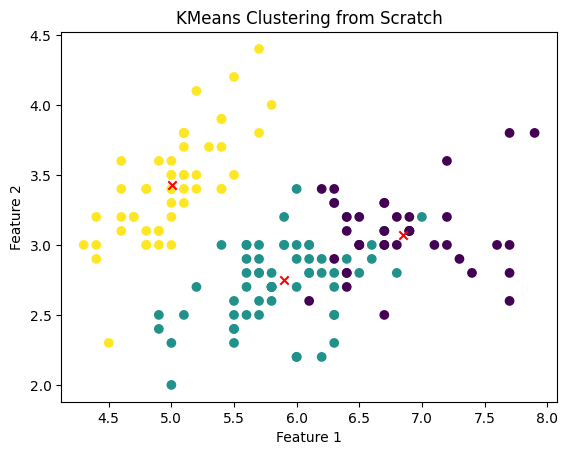

In [19]:
plot_clusters(X, labels, centroids)

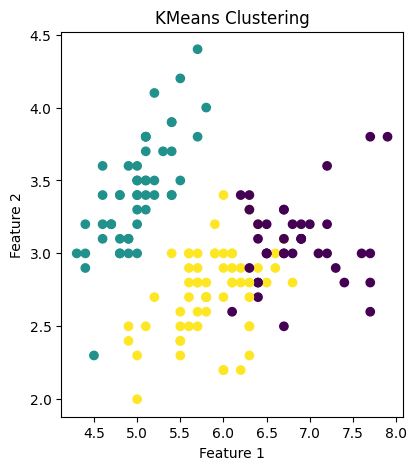

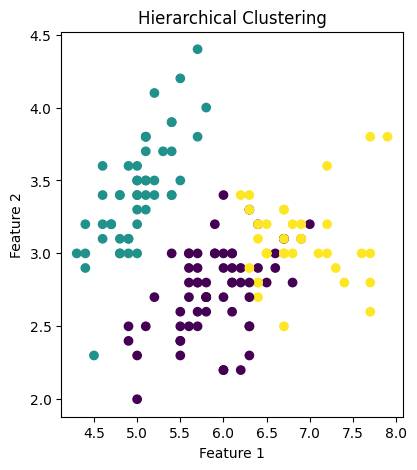

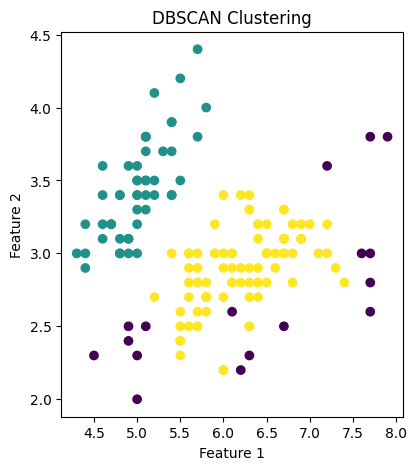

Silhouette Scores:
KMeans: 0.55
Hierarchical: 0.55
DBSCAN: 0.49


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
X = iris.data

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Hierarchical Clustering
# AgglomerativeClustering(
#     n_clusters: int | None = 2,
#     *,
#     affinity: str | ((...) -> Any) = "deprecated",
#     metric: str | ((...) -> Any) | None = None,
#     memory: Memory | str | None = None,
#     connectivity: ArrayLike | ((...) -> Any) | None = None,
#     compute_full_tree: bool | Literal['auto'] = "auto",
#     linkage: Literal['ward', 'complete', 'average', 'single'] = "ward",
#     distance_threshold: Float | None = None,
#     compute_distances: bool = False
# )
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

# DBSCAN Clustering
# class DBSCAN(
#     eps: Float = 0.5,
#     *,
#     min_samples: Int = 5,
#     metric: str | ((...) -> Any) = "euclidean",
#     metric_params: dict | None = None,
#     algorithm: Literal['auto', 'ball_tree', 'kd_tree', 'brute'] = "auto",
#     leaf_size: Int = 30,
#     p: Float | None = None,
#     n_jobs: Int | None = None
# )
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Visualization Function
def plot_clusters(X, labels, title):

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plotting the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_clusters(X, kmeans_labels, "KMeans Clustering")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plot_clusters(X, hierarchical_labels, "Hierarchical Clustering")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plot_clusters(X, dbscan_labels, "DBSCAN Clustering")

# Calculate and print Silhouette Scores
kmeans_score = silhouette_score(X, kmeans_labels)
hierarchical_score = silhouette_score(X, hierarchical_labels)
dbscan_score = silhouette_score(X, dbscan_labels)

print("Silhouette Scores:")
print(f"KMeans: {kmeans_score:.2f}")
print(f"Hierarchical: {hierarchical_score:.2f}")
print(f"DBSCAN: {dbscan_score:.2f}")
